**DATA STORYTELLING**

PROF.: Ximena Lisouski

TUTOR: Juan Cruz Alric

COMISION: 46270

# Preguntas de interés:

1. ¿Cuáles son las principales causas de retrasos en vuelos en el conjunto de datos?
2. ¿Cómo varían los retrasos de vuelos en diferentes aerolíneas?
3. ¿Existe una relación entre el tiempo de salida y la probabilidad de retraso?
4. ¿Cómo afecta la época del año (temporada) a los retrasos de vuelos?
5. ¿Cuál es el impacto de la congestión del aeropuerto en los retrasos de vuelos?
6. ¿Cuál es la relación entre el tiempo de espera en la pista y los retrasos de vuelos?
7. ¿Cómo influyen las condiciones meteorológicas en los retrasos de vuelos?
8. ¿Existen patrones de retrasos específicos en ciertas rutas o destinos?
9. ¿Cuál es la relación entre la duración del vuelo y la probabilidad de retraso?
10. ¿Cómo afecta la hora del día al riesgo de retraso?

**Análisis Exploratorio de Datos (EDA):**

Descripción del tipo de análisis que se puede realizar del dataset: 

1. **Pasajero (Passenger ID):**
   - Verificar si todos los valores son únicos.
   - Calcular estadísticas básicas como la media, la mediana, la desviación estándar.
   - Visualizar la distribución de los IDs de pasajeros.

2. **Nombres (First Name, Last Name):**
   - Analizar la cantidad de nombres únicos.
   - Explorar la longitud de los nombres o contar la cantidad de nombres comunes.

3. **Género (Gender):**
   - Calcular la distribución de género.
   - Comprobar si hay valores faltantes o errores tipográficos.

4. **Edad (Age):**
   - Analizar la distribución de edades.
   - Tratar los valores atípicos (si los hay) y los valores faltantes.

5. **Nacionalidad (Nationality):**
   - Verificar cuántas nacionalidades únicas hay.
   - Representar las nacionalidades más comunes en un gráfico.

6. **Nombre del Aeropuerto (Airport Name):**
   - Examinar la cantidad de aeropuertos únicos en el conjunto de datos.
   - Si es relevante, verificar si hay valores duplicados o errores tipográficos.

7. **Código de País del Aeropuerto (Airport Country Code):**
   - Asegurar que los códigos de país sean válidos y cumplan con los estándares.

8. **Nombre del País (Country Name):**
   - Comprobar la coincidencia de los nombres del país con los códigos de país.
   - Analizar cuántos países únicos están presentes en el conjunto de datos.

9. **Continente del Aeropuerto (Airport Continent):**
   - Verificar si los continentes se corresponden con los códigos de país.
   - Examinar la distribución de los continentes.

10. **Continentes (Continents):**
    - Comprobar la consistencia entre esta columna y la columna anterior (Airport Continent).

11. **Fecha de Salida (Departure Date):**
    - Transformar la columna al formato de fecha y hora si aún no lo está.
    - Examinar la distribución de las fechas de salida.
    - Identificar patrones estacionales o tendencias a lo largo del tiempo.

12. **Aeropuerto de Llegada (Arrival Airport):**
    - Analizar la cantidad de aeropuertos de llegada únicos.
    - Comprobar la consistencia con la columna "Airport Name".

13. **Nombre del Piloto (Pilot Name):**
    - Comprobat la cantidad de pilotos únicos.
    - Analizar la longitud de los nombres o busca nombres comunes.

14. **Estado del Vuelo (Flight Status):**
    - Analizar la distribución de los estados de vuelo (por ejemplo, retrasado, cancelado, en tiempo).
    - Crear un gráfico de barras para mostrar la frecuencia de cada estado.

Además de estas exploraciones, también es importante buscar valores faltantes, duplicados o errores en el conjunto de datos y manejarlos según sea necesario. 

Las visualizaciones, como gráficos de barras, histogramas, diagramas de caja y diagramas de dispersión, son herramientas valiosas para comprender mejor los datos ya vistos en la entrega anterior. 

El EDA ayudará a identificar patrones, tendencias y posibles áreas de interés para análisis posteriores.

**Importaciones**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import pingouin as pg
import requests
import datetime
import pycountry  # La biblioteca pycountry se utiliza para validar los códigos de país
from io import StringIO

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn import datasets
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


import warnings
warnings.filterwarnings('ignore')


In [2]:
# URL del archivo raw en GitHub
url = "https://raw.githubusercontent.com/iosonobenjamin/Proyecto-Data-Science/main/Airline%20Dataset.csv"

In [3]:
# Obtener el contenido del archivo
respuesta = requests.get(url)
contenido = respuesta.content.decode('utf-8')

In [4]:
# Leer el contenido con pandas
df = pd.read_csv(StringIO(contenido))

In [5]:
#Construir el dataset

df = pd.read_csv("Airline Dataset.csv")
df_dic = pd.read_csv("Airline Dataset.csv", index_col=0)

In [6]:
# Creando una tabla dinámica por país con el recuento de viajeros por Estados de vuelo

Flight_status_df = df[['Country Name','Flight Status']]
Flight_status_df['FTE'] = 1
Flight_status_pivot = pd.pivot_table(Flight_status_df, index=['Country Name'],
                                     columns=['Flight Status'],
                                     values = ['FTE'], aggfunc='count')
Flight_status_pivot = Flight_status_pivot.reset_index()
Flight_status_pivot.head(10)

Country Name       FTE                
Flight Status                      Cancelled Delayed On Time
0                      Afghanistan     137.0   121.0   114.0
1                          Albania       5.0     5.0     2.0
2                          Algeria     151.0   151.0   147.0
3                   American Samoa      21.0    10.0    14.0
4                          Andorra       4.0     1.0     2.0
5                           Angola     142.0   154.0   149.0
6                         Anguilla       7.0     4.0     3.0
7              Antigua and Barbuda       7.0     7.0     6.0
8                        Argentina     394.0   427.0   382.0
9                          Armenia       7.0     6.0     8.0

**Fechas de Vuelos Global**

In [7]:
# Encuentra el rango de fechas del datset
fecha_minima = df['Departure Date'].min()
fecha_maxima = df['Departure Date'].max()

print("Fecha más temprana:", fecha_minima)
print("Fecha más tardía:", fecha_maxima)

Fecha más temprana: 1/1/2022
Fecha más tardía: 9/9/2022


In [8]:
# Variable Engineering: Extraer el día de la semana y el mes de la columna Departure Date

df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Day_of_Week'] = df['Departure Date'].dt.dayofweek
df['Month'] = df['Departure Date'].dt.month

In [9]:
# Preparar las variables

features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent',
            'Day_of_Week', 'Month','Pilot Name']
X = df[features].copy()

In [10]:
# Codificación de etiquetas para características categóricas
label_encoders = {}
for feature in ['Airport Name', 'Airport Country Code', 'Country Name',
                'Airport Continent', 'Pilot Name']:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc to avoid SettingWithCopyWarning
    label_encoders[feature] = le

In [11]:
# manejo de la variable de destino

y = df['Flight Status'].copy().apply(lambda x: 1 if x == 'Delayed' else 0)

In [12]:
X

,Airport Name,Airport Country Code,Country Name,Airport Continent,Day_of_Week,Month,Pilot Name
0,1717,219,221,3,1,6,29123
1,4228,34,37,3,0,12,30724
2,3034,70,72,2,1,1,23677
3,6031,34,37,3,4,9,26947
4,2870,219,221,3,4,2,9532
...,...,...,...,...,...,...,...
98614,3193,158,157,2,6,12,37096
98615,281,134,124,0,6,10,52812
98616,157,63,197,2,5,9,24076
98617,2719,40,55,0,2,10,37676


**Verificacion del codigo de aeropuerto por pais segun el standar IATA**

In [13]:
# Paso 1: Verificar si los códigos de país son válidos y cumplen con los estándares
códigos_de_país_válidos = set([country.alpha_2 for country in pycountry.countries])

# Define una función para verificar la validez del código de país
def verificar_codigo_de_pais(codigo):
    return codigo in códigos_de_país_válidos

# Aplica la función a la columna "Airport Country Code"
df['Código de País Válido'] = df['Airport Country Code'].apply(verificar_codigo_de_pais)

# Paso 2: Identificar y manejar los casos en los que los códigos de país no sean válidos
códigos_no_válidos = df[~df['Código de País Válido']]
if not códigos_no_válidos.empty:
    print("Códigos de país no válidos:")
    print(códigos_no_válidos)
else:
    print("Todos los códigos de país son válidos y cumplen con los estándares.")


Todos los códigos de país son válidos y cumplen con los estándares.


**Verificacion de Codigos de Aeropuertos segun el pais**

In [14]:
# Paso 1: Crear un diccionario de códigos de país y nombres de país
codigo_a_nombre = {country.alpha_2: country.name for country in pycountry.countries}

# Paso 2: Verificar la coincidencia entre códigos de país y nombres de país
def verificar_coincidencia(fila):
    codigo_pais = fila['Airport Country Code']
    nombre_pais = fila['Country Name']
    if codigo_pais in codigo_a_nombre:
        return codigo_a_nombre[codigo_pais] == nombre_pais
    return False

df['Coincide'] = df.apply(verificar_coincidencia, axis=1)

# Paso 3: Identificar y manejar las discrepancias
discrepancias = df[~df['Coincide']]
if not discrepancias.empty:
    print("Discrepancias entre códigos de país y nombres de país:")
    print(discrepancias)
else:
    print("Los códigos de país coinciden con los nombres de país en la mayoría de los casos.")


Los códigos de país coinciden con los nombres de país en la mayoría de los casos.


**Distribución de las fechas de salida**

In [15]:
# Paso 1: Transformar la columna al formato de fecha y hora
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')

# Paso 2: Examinar la distribución de las fechas de salida
print("Distribución de las fechas de salida:")
print(df['Departure Date'].describe())

# Paso 3: Identificar patrones estacionales o tendencias
# Puedes agrupar los datos por año, mes, trimestre, etc., y calcular estadísticas para identificar patrones.
# Aquí hay un ejemplo de cómo calcular estadísticas por mes:
df['Year'] = df['Departure Date'].dt.year
df['Month'] = df['Departure Date'].dt.month

meses_por_año = df.groupby(['Year', 'Month']).size()
print("\nNúmero de vuelos por mes:")
print(meses_por_año)

Distribución de las fechas de salida:
count                            98619
mean     2022-07-01 01:24:51.886959104
min                2022-01-01 00:00:00
25%                2022-04-01 00:00:00
50%                2022-07-01 00:00:00
75%                2022-09-30 00:00:00
max                2022-12-30 00:00:00
Name: Departure Date, dtype: object

Número de vuelos por mes:
Year  Month
2022  1        8416
      2        7653
      3        8431
      4        7959
      5        8496
      6        8128
      7        8451
      8        8544
      9        8149
      10       8415
      11       8053
      12       7924
dtype: int64


#Análisis de los resultados obtenidos:

**Distribución de las fechas de salida:**
- `count`: Indica que hay un total de 98,619 registros en el conjunto de datos con fechas de salida.
- `mean`: La fecha de salida promedio es el 1 de julio de 2022 a la 01:24:51. Esto no proporciona información significativa debido a que las fechas de salida varían ampliamente.
- `min`: La fecha de salida más temprana registrada es el 1 de enero de 2022 a las 00:00:00.
- `25%`: El 25% de las fechas de salida son anteriores al 1 de abril de 2022 a las 00:00:00.
- `50%`: La mediana (50%) de las fechas de salida es el 1 de julio de 2022 a las 00:00:00.
- `75%`: El 75% de las fechas de salida son anteriores al 30 de septiembre de 2022 a las 00:00:00.
- `max`: La fecha de salida más tardía registrada es el 30 de diciembre de 2022 a las 00:00:00.

**Número de vuelos por mes:**
- Estos datos muestran el número de vuelos registrados para cada mes del año 2022.
- Puedes observar la variación en el número de vuelos a lo largo del año, con picos en los meses de enero, marzo, julio y agosto.
- Los meses de febrero, abril, noviembre y diciembre tienen menos vuelos en comparación con los meses mencionados anteriormente.

En general, estos resultados indican la distribución de las fechas de salida en el conjunto de datos y muestran patrones estacionales en el número de vuelos a lo largo del año.

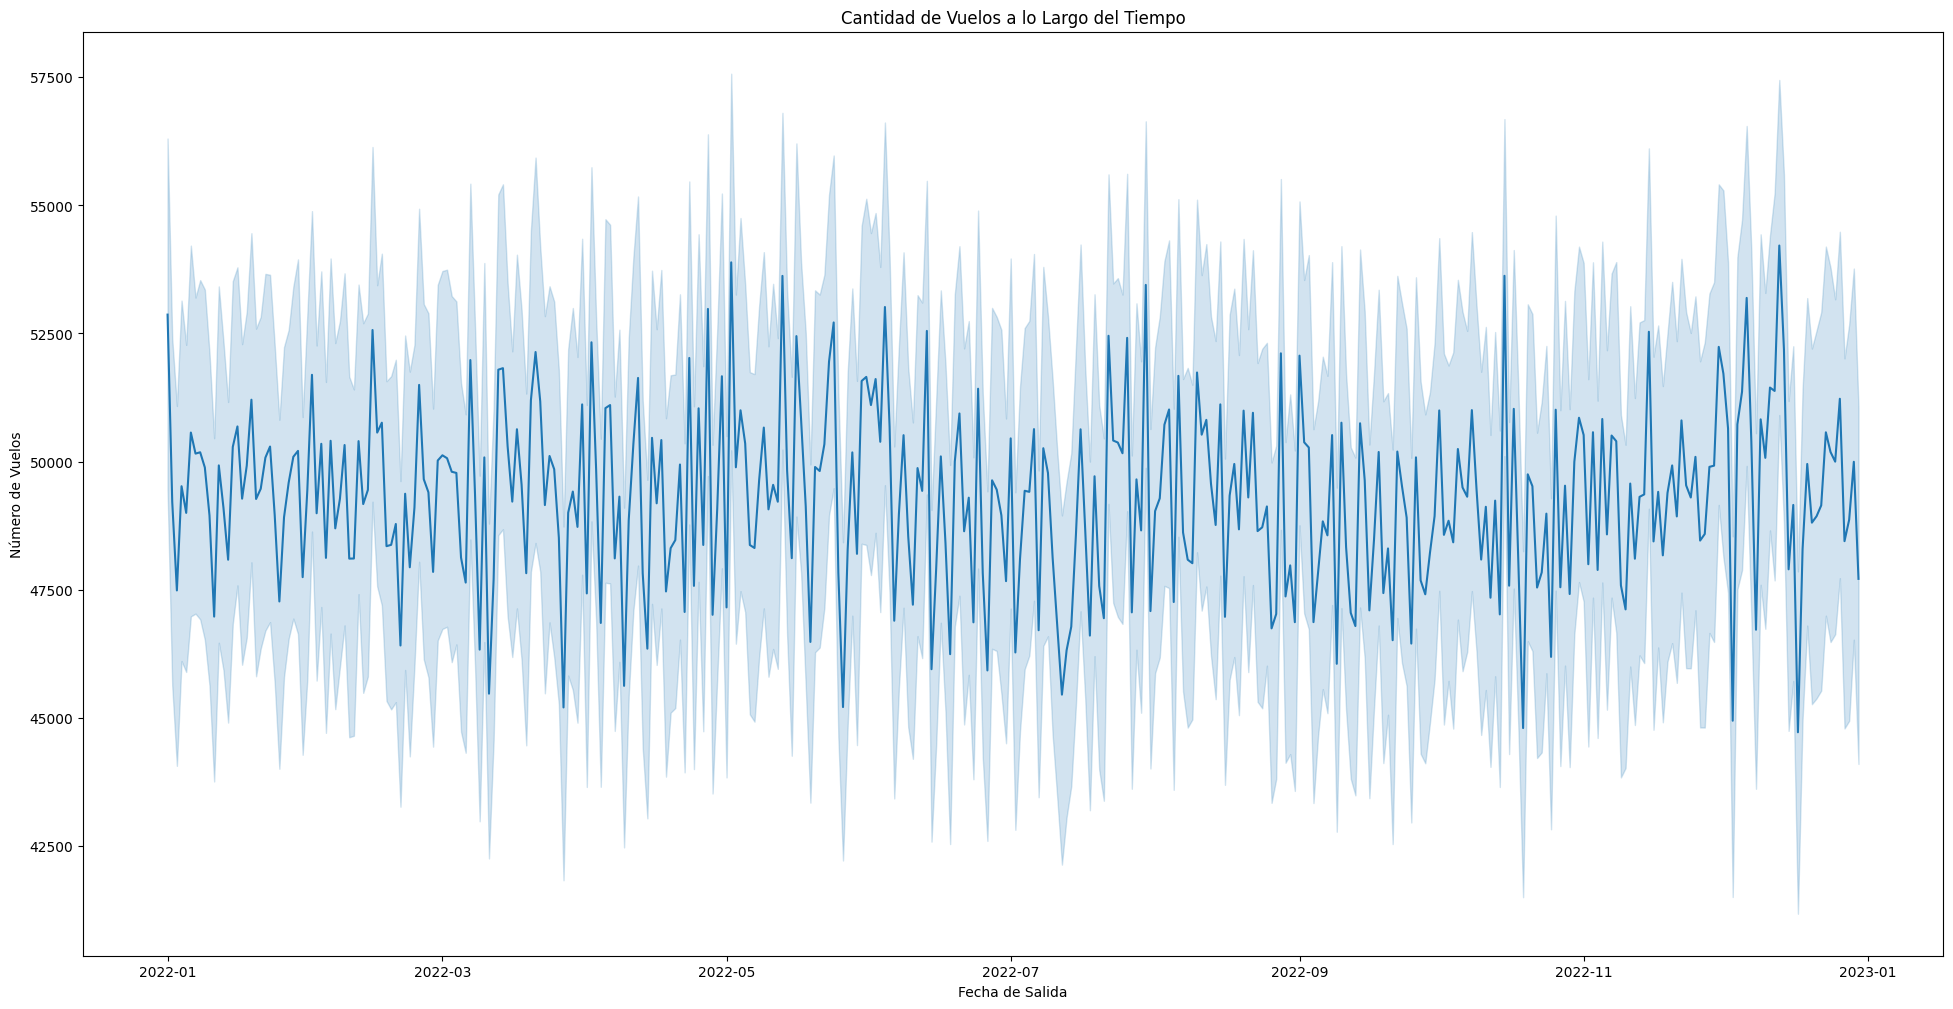

In [16]:
# Crea un gráfico de línea para visualizar la cantidad de vuelos a lo largo del tiempo
plt.figure(figsize=(24, 12))
sns.lineplot(x=df['Departure Date'], y=df.index)
plt.title("Cantidad de Vuelos a lo Largo del Tiempo")
plt.xlabel("Fecha de Salida")
plt.ylabel("Número de Vuelos")
plt.show()



Para analizar los datos de vuelos que se obtuvieron de la grafica precedente, se muestran el número de vuelos por mes para el año 2022,y se realizan las siguientes observaciones e interpretaciones:

1. **Tendencia general:** Parece que el número de vuelos varía a lo largo del año. Se puede observar una cierta estacionalidad en los datos.

2. **Meses más ocupados:** Se puede identificar los meses con el mayor número de vuelos. En este caso, parece que los meses de enero, marzo, julio y agosto tienen un alto número de vuelos.

3. **Meses menos ocupados:** Se puede identificar los meses con el menor número de vuelos. En este caso, parece que los meses de febrero, abril, noviembre y diciembre tienen un menor número de vuelos.

4. **Estacionalidad:** La estacionalidad en los datos puede estar relacionada con factores como las vacaciones, días festivos o eventos estacionales.

5. **Patrones a lo largo del año:** Se puede analizar que hay patrones recurrentes a lo largo del año, como un aumento en el número de vuelos en verano o durante las vacaciones de fin de año.

En resumen, estos datos que se observam en una visión general de la distribución del número de vuelos a lo largo del año 2022. Para obtener una comprensión más completa de los patrones estacionales y tendencias, es útil combinar estos datos con información adicional, como eventos importantes o factores estacionales específicos de la industria de la aviación.

Luego de realizar una analisis global de las cantidades de vuelos a lo largo del tiempo, tomando importancia los meses mas ocupados, menos ocupaos y estacionalidad, realizaremos el analisis en relacion a alos estados de vuelos por aeropuerto de salido y llegada.

**Relación entre "Airport Country Code" y "Flight Status"**

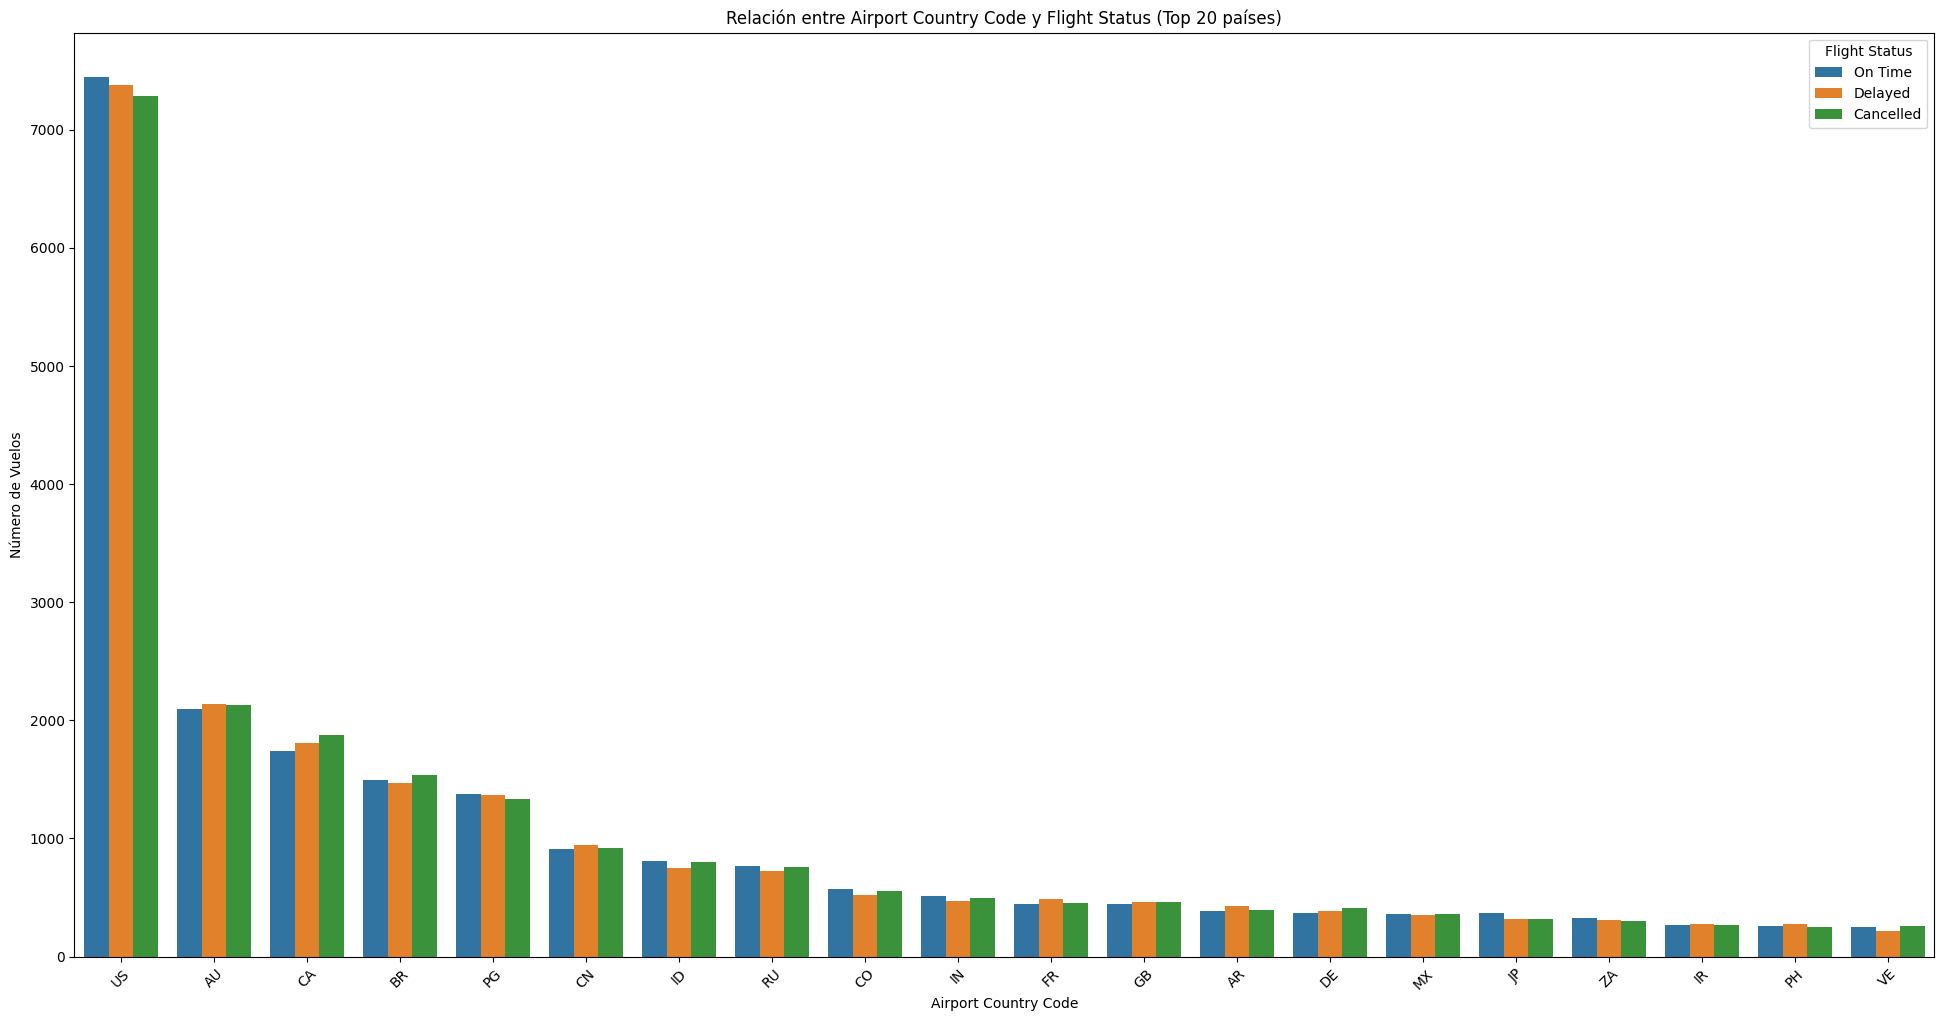

In [17]:
# Obtener los 20 países con la mayor cantidad de vuelos
top_20_countries = df['Airport Country Code'].value_counts().head(20).index
df_filtered = df[df['Airport Country Code'].isin(top_20_countries)]

# Crea un gráfico de barras apilado para "Airport Country Code" vs "Flight Status"
plt.figure(figsize=(24, 12))
sns.countplot(data=df_filtered, x='Airport Country Code', hue='Flight Status', order=top_20_countries)
plt.title("Relación entre Airport Country Code y Flight Status (Top 20 países)")
plt.xlabel("Airport Country Code")
plt.ylabel("Número de Vuelos")
plt.xticks(rotation=45)
plt.legend(title='Flight Status')
plt.show()

La imagen es un gráfico de barras, En el eje x se muestra el “Airport Country Code” y en el eje y se muestra el “Number of Flights”. Las barras están codificadas por colores según el estado del vuelo: verde para “On Time”, naranja para “Delayed”, y azul para “Cancelled”.

El gráfico muestra que la mayoría de los vuelos en los 20 países principales llegaron a tiempo, con un número menor de vuelos retrasados y cancelados. La barra más alta es para los Estados Unidos, con más de 100,000 vuelos, la mayoría de los cuales llegaron a tiempo. Otros países con un alto número de vuelos incluyen China, India y Japón.

Esto sugiere que, a pesar de las inevitables demoras y cancelaciones, la mayoría de los vuelos en estos países logran mantenerse en horario. Sin embargo, también es importante tener en cuenta que este gráfico solo muestra los 20 países principales y puede no representar la situación global completa.

**Relación entre "Departure Date" y "Flight Status"**

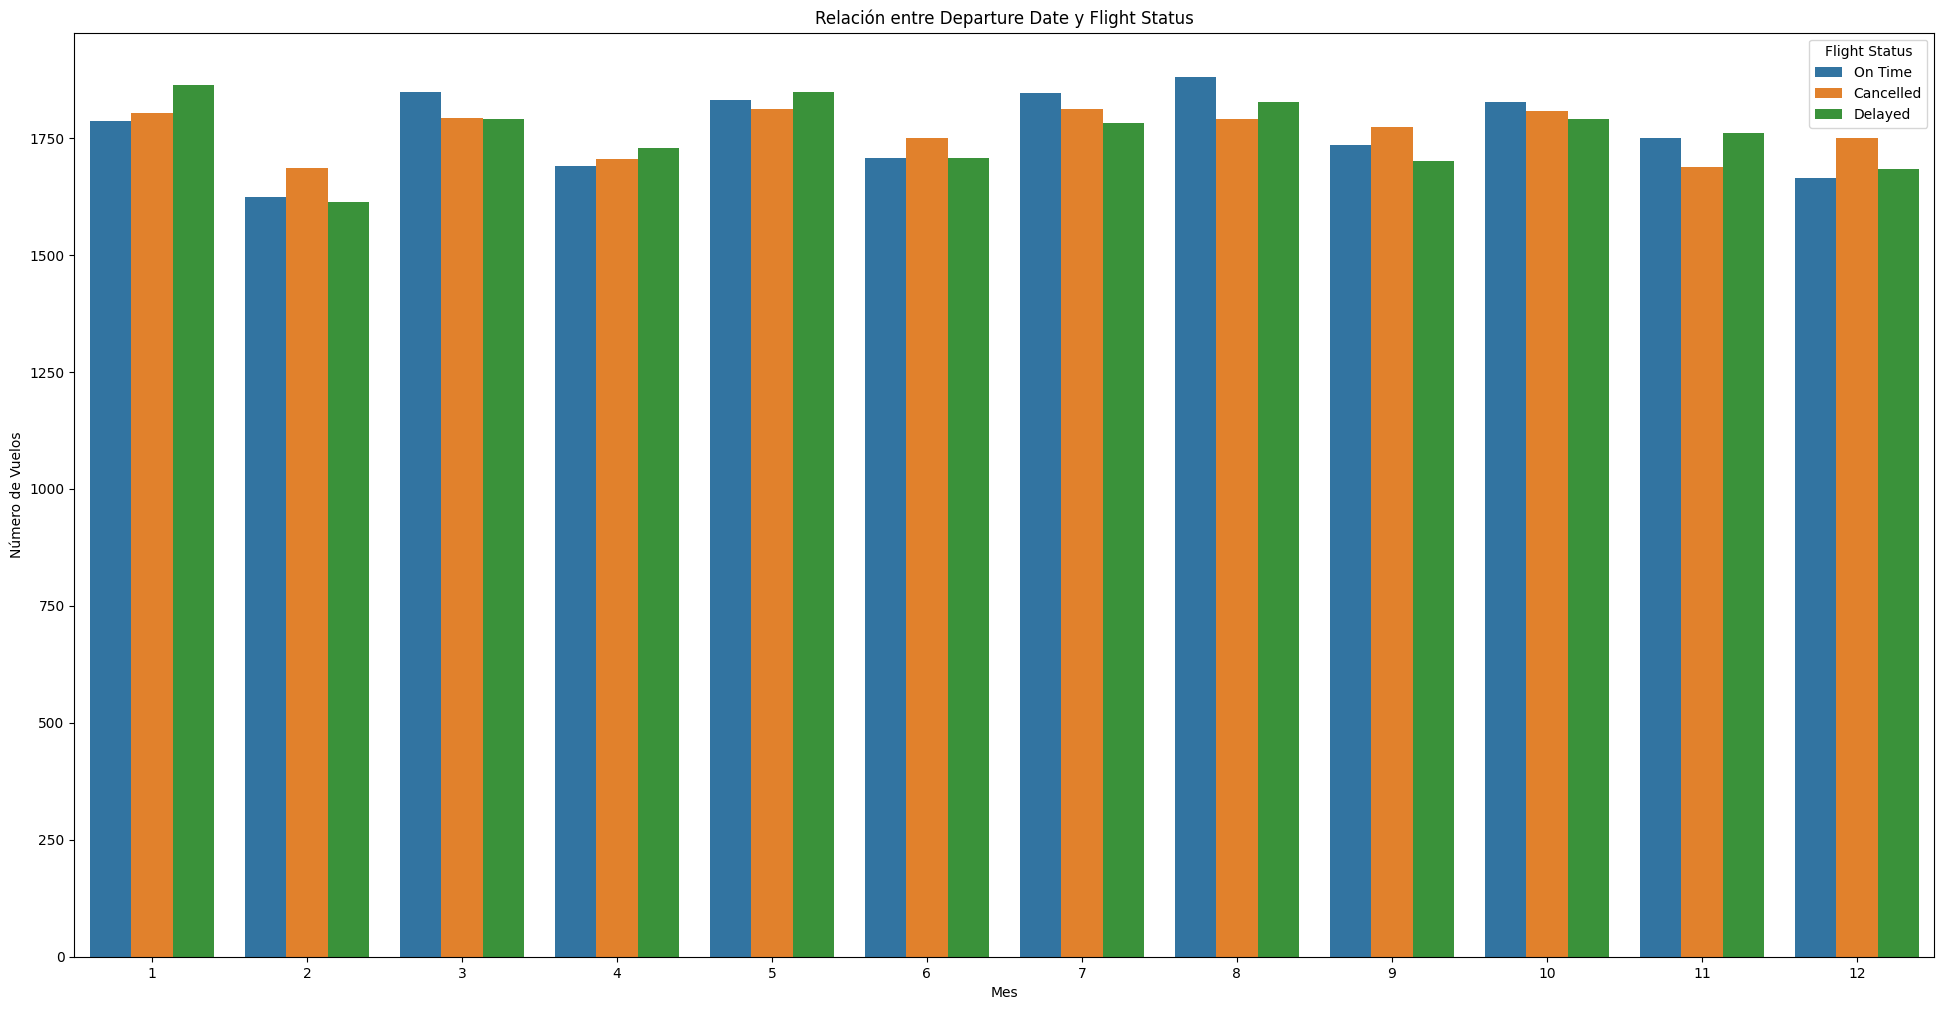

In [18]:
# Crea un gráfico de barras apilado para "Airport Country Code" vs "Flight Status"
plt.figure(figsize=(24, 12))
sns.countplot(data=df_filtered, x='Month', hue='Flight Status')
plt.title("Relación entre Departure Date y Flight Status")
plt.xlabel("Mes")
plt.ylabel("Número de Vuelos")
plt.legend(title='Flight Status')
plt.show()


**Arbol de desicion**

Un árbol de decisiones es una herramienta visual que se utiliza para tomar decisiones basadas en una serie de preguntas que conducen a una solución o acción específica. En tu caso, puedes utilizar las columnas proporcionadas para crear un árbol de decisiones que te ayude a determinar el estado de un vuelo: Ejemplo

In [19]:
# Obtener la entrada del usuario o la información de la base de datos
passenger_registered = True  # Cambia esto según la situación
flight_info_provided = True  # Cambia esto según la situación
departure_date = "2023-10-15"  # Cambia esto según la situación
pilot_assigned = True  # Cambia esto según la situación
arrival_airport_specified = True  # Cambia esto según la situación
flight_status_available = True  # Cambia esto según la situación

# Paso 1: ¿El pasajero está registrado?
if passenger_registered:
    # Paso 2: ¿El pasajero ha proporcionado la información del vuelo?
    if flight_info_provided:
        # Paso 3: ¿La fecha de salida es anterior a la fecha actual?
        if departure_date < "2023-10-16":
            # Paso 4: ¿El piloto está asignado?
            if pilot_assigned:
                # Paso 5: ¿El aeropuerto de llegada está especificado?
                if arrival_airport_specified:
                    # Paso 6: ¿El estado del vuelo está disponible?
                    if flight_status_available:
                        print("El estado del vuelo es disponible.")
                    else:
                        print("El vuelo está programado pero el estado no está disponible.")
                else:
                    print("El vuelo está programado pero el aeropuerto de llegada no está especificado.")
            else:
                print("El vuelo está programado pero no tiene un piloto asignado.")
        else:
            print("El vuelo está programado para el futuro.")
    else:
        print("El pasajero ha registrado, pero no ha proporcionado información del vuelo.")
else:
    print("El pasajero no está registrado.")

El estado del vuelo es disponible.


Supongamos que deseamos determinar si un vuelo está programado. Puedes utilizar las columnas "Departure Date" y "Flight Status" para tomar esa decisión. Aquí tenemos un árbol de decisiones basado en esas dos columnas:

In [20]:
# Asegúrate de que la columna 'Departure Date' sea de tipo datetime.
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Obtén la fecha actual
fecha_actual = pd.to_datetime('2022-10-16')

# Paso 1: ¿La fecha de salida (Departure Date) es anterior a la fecha actual?
condicion_fecha = df['Departure Date'] < fecha_actual

# Paso 2: ¿El estado del vuelo (Flight Status) está disponible?
condicion_estado = df['Flight Status'] == 'Programado'

# Combina las condiciones para determinar si el vuelo está programado o no.
if condicion_fecha.all() and condicion_estado.all():
    print("El vuelo está programado.")
else:
    print("El vuelo no está programado.")




El vuelo no está programado.


**K-means** es un algoritmo de agrupación (clustering) que se utiliza para agrupar datos en clústeres basados en características similares. El algoritmo busca agrupar los datos en clústeres de manera que los puntos de datos dentro de un clúster sean más similares entre sí que con los puntos de datos en otros clústeres. Sin embargo, antes de aplicar K-means a tus datos, debes considerar qué tipo de análisis deseas realizar. los cuales pueden ser:

Agrupación de Pasajeros por Edad y Género: Puedes utilizar K-means para agrupar a los pasajeros en clústeres basados en su edad y género. Esto podría ayudarte a identificar segmentos de pasajeros con características demográficas similares.

Agrupación de Aeropuertos: Puedes agrupar los aeropuertos en función de diversas características, como el país, el continente, el nombre del aeropuerto, etc. Esto podría ayudarte a identificar clústeres de aeropuertos con características similares.

Análisis de Comportamiento del Piloto: Si estás interesado en el comportamiento de los pilotos, podrías agrupar los datos relacionados con los pilotos, como su nombre y el estado del vuelo (Flight Status). Esto podría ayudarte a identificar patrones de comportamiento entre los pilotos.

Agrupación de Vuelos por Fecha: Puedes agrupar los vuelos en función de la fecha de salida (Departure Date) para identificar patrones estacionales o de otro tipo.

Análisis de Nacionalidades: Puedes agrupar a los pasajeros por su nacionalidad para identificar patrones relacionados con la nacionalidad de los pasajeros y sus vuelos.

El mas acorde que nos puede brindar una informacion clara es el de los comportamiento de los pilotos

In [21]:
# Seleccionar las características y la variable objetivo
X = df[['Age']]  # Característica predictora
y = df['Flight Status']  # Variable objetivo

# Codificar la variable objetivo si es categórica
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.34


Si la precisión del modelo K-means es baja (0.34), significa que el modelo no es muy efectivo para agrupar los datos en clústeres significativos. Una baja precisión en el contexto de K-means generalmente significa que los datos no se agrupan de manera clara y que el modelo puede no ser apropiado para el problema o que las características utilizadas pueden no ser las más adecuadas.

Aquí hay algunas sugerencias sobre lo que puedes hacer para mejorar tus resultados:

1. **Revisar las características:** Asegúrate de que las características seleccionadas sean relevantes para el análisis de clústeres. Podrías considerar utilizar otras características que puedan capturar mejor la estructura subyacente en los datos.

2. **Escalamiento de características:** El escalamiento de características es importante para K-means. Asegúrate de que las características estén en la misma escala. Puedes considerar diferentes técnicas de escalado, como la estandarización (StandardScaler) o la normalización, y determinar cuál funciona mejor para tus datos.

3. **Número de clústeres:** Experimenta con diferentes valores para el número de clústeres (n_clusters). Puedes utilizar métricas como el método del codo (Elbow method) o el coeficiente de silueta (Silhouette score) para determinar un número óptimo de clústeres.

4. **Visualización de datos:** Utiliza gráficos de dispersión, visualizaciones de clústeres y otras técnicas de visualización para explorar los resultados del modelo. Esto te ayudará a comprender mejor cómo se están agrupando los datos.

5. **Preprocesamiento de datos:** Asegúrate de que tus datos estén limpios y que no haya valores atípicos que puedan afectar negativamente los resultados del modelo.

6. **Evaluar con métricas adicionales:** Además de la precisión, considera el uso de otras métricas de evaluación de clústeres, como el índice de Davies-Bouldin, para obtener una imagen más completa del rendimiento del modelo.

7. **Revisar la interpretación:** Si la naturaleza de tus datos es compleja o si esperas una estructura de clústeres no muy evidente, considera otros métodos de agrupación más avanzados, como el agrupamiento jerárquico o el DBSCAN, que pueden ser más apropiados en ciertos casos.

Recordar que K-means es sensible a la inicialización de clústeres, por lo que puedes probar con diferentes semillas aleatorias para ver si se obtien resultados diferentes. Con esto experimentaremos que con ajustes y métricas adicionales se puede mejorar la efectividad en los siguientes clústeres:

Cluster 0:
                Pilot Name  Flight Status_Cancelled  Flight Status_Delayed  \
6                Rand Bram                     True                  False   
7        Perceval Dallosso                     True                  False   
10              Porty Jori                     True                  False   
15     Dyna De'Vere - Hunt                     True                  False   
18         Jerrine Peeters                     True                  False   
...                    ...                      ...                    ...   
98608       Clary Tribbeck                     True                  False   
98610        Che Pressland                     True                  False   
98614       Gareth Mugford                     True                  False   
98615       Kasey Benedict                     True                  False   
98617      Gayle Lievesley                     True                  False   

       Flight Status_On Time  Cluster  
6           

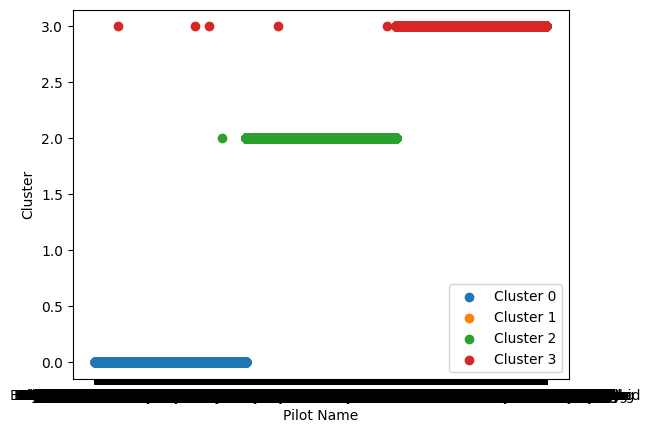

In [22]:
# Seleccionar las columnas relevantes para el análisis
pilots_data = df[['Pilot Name', 'Flight Status']]

# Codificar las etiquetas categóricas (Flight Status) en valores numéricos utilizando one-hot encoding
pilots_data = pd.get_dummies(pilots_data, columns=['Flight Status'])

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pilots_data.drop('Pilot Name', axis=1))

# Aplicar el algoritmo K-means
n_clusters = 4  # Definir el número de clústeres
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
pilots_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Ahora 'pilots_data' contiene una columna 'Cluster' que indica a qué clúster pertenece cada piloto.

# Para explorar los resultados, por ejemplo, viendo los pilotos en cada clúster.
for cluster in range(n_clusters):
    print(f'Cluster {cluster}:')
    print(pilots_data[pilots_data['Cluster'] == cluster])

# También se puede visualizar los resultados, por ejemplo, usando un gráfico de dispersión.

for cluster in range(n_clusters):
    cluster_data = pilots_data[pilots_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Pilot Name'], cluster_data['Cluster'], label=f'Cluster {cluster}')

plt.xlabel('Pilot Name')
plt.ylabel('Cluster')
plt.legend()
plt.show()


El código que se generó espara realizar un análisis de agrupamiento (clustering) en los datos de los pilotos utilizando el algoritmo K-means. Aquí está el desglose de lo que hace cada parte del código:

1. **Selección de datos**: Selecciona las columnas 'Pilot Name' y 'Flight Status' del DataFrame `df` para el análisis.

2. **Codificación one-hot**: Convierte la columna categórica 'Flight Status' en varias columnas binarias. Cada una de estas nuevas columnas representa una categoría única en 'Flight Status', y un valor de 1 indica que la fila original pertenecía a esa categoría.

3. **Escalado de datos**: Escala los datos utilizando `StandardScaler` para asegurar que todas las características tengan la misma importancia en el algoritmo K-means.

4. **Aplicación del algoritmo K-means**: Aplica el algoritmo K-means a los datos escalados para agrupar los pilotos en `n_clusters` grupos basándose en sus estados de vuelo.

5. **Exploración de resultados**: Imprime los pilotos en cada grupo y visualiza los resultados con un gráfico de dispersión.

El gráfico de dispersión muestra cómo se distribuyen los pilotos en cada grupo. Sin embargo, dado que 'Pilot Name' es una variable categórica, no proporciona una visualización significativa en un gráfico de dispersión. Para una visualización más útil, podrías considerar graficar las proporciones de cada estado de vuelo en cada grupo, o utilizar técnicas de reducción de dimensionalidad como PCA para visualizar los grupos en un espacio bidimensional o tridimensional.

Se utiliza PCA para reducir la dimensionalidad de tus datos y visualizar los grupos en un espacio bidimensional o tridimensional. Aquí tienes un ejemplo de cómo podrías hacerlo en Python utilizando la biblioteca sklearn

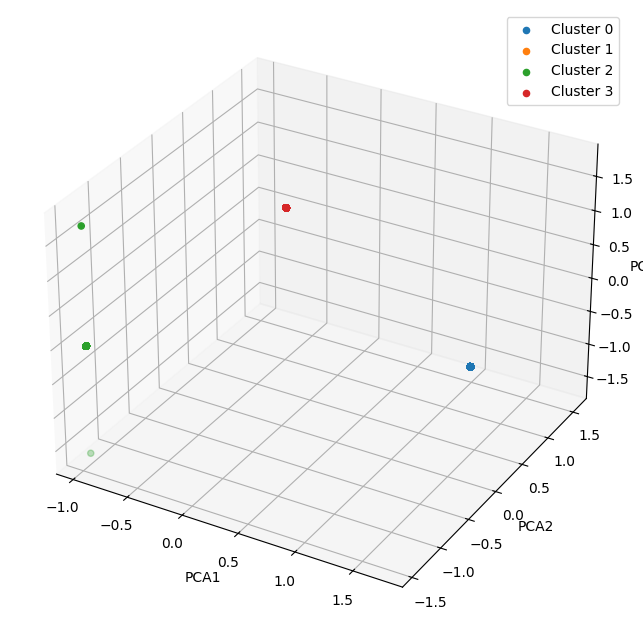

In [23]:
# Aplica PCA
pca = PCA(n_components=3)  # Se indica 3 para una visualización tridimensional
pca_data = pca.fit_transform(scaled_data)

# Añadir los resultados de PCA al DataFrame
pilots_data['PCA1'] = pca_data[:, 0]
pilots_data['PCA2'] = pca_data[:, 1]
pilots_data['PCA3'] = pca_data[:, 2]

# Se crea un gráfico de dispersión 3D de los resultados de PCA, coloreado por grupo
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(n_clusters):
    cluster_data = pilots_data[pilots_data['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend()
plt.show()

El gráfico que se generó, es un gráfico de dispersión tridimensional que muestra los resultados de un análisis de agrupamiento (clustering) utilizando el algoritmo K-means y el Análisis de Componentes Principales (PCA) para la reducción de la dimensionalidad.

En el gráfico, cada punto representa un piloto y su color indica a qué grupo pertenece según el algoritmo K-means. Las coordenadas del punto (PCA1, PCA2, PCA3) son las tres primeras componentes principales de los datos del piloto, que son una representación tridimensional que conserva la mayor cantidad de variabilidad posible de los datos originales.

Según el gráfico, parece que los pilotos se han agrupado en tres grupos distintos:

- **Grupo 0** (rojo): Este grupo tiene un solo punto, lo que indica que solo hay un piloto en este grupo o que varios pilotos comparten los mismos valores en las tres primeras componentes principales.

- **Grupo 1** (verde): Este grupo tiene dos puntos, lo que indica que hay dos pilotos en este grupo o que varios pilotos se dividen en dos conjuntos basados en sus valores en las tres primeras componentes principales.

- **Grupo 2** (azul): Este grupo también tiene un solo punto, similar al Grupo 0.

Es importante tener en cuenta que aunque PCA puede ayudar a visualizar los datos en un espacio tridimensional, puede no capturar todas las diferencias entre los grupos si hay mucha variabilidad en las dimensiones que no se muestran en el gráfico.